In [95]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
from matplotlib import style 
from sklearn.metrics import mean_squared_error

In [96]:
data = pd.read_csv("student-mat.csv", sep = ";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [97]:
data = data[["G1", "G2", "G3", "failures", "absences", "studytime","freetime"]]
data.head()

,G1,G2,G3,failures,absences,studytime,freetime
0,5,6,6,0,6,2,3
1,5,5,6,0,4,2,3
2,7,8,10,3,10,2,3
3,15,14,15,0,2,3,2
4,6,10,10,0,4,2,3


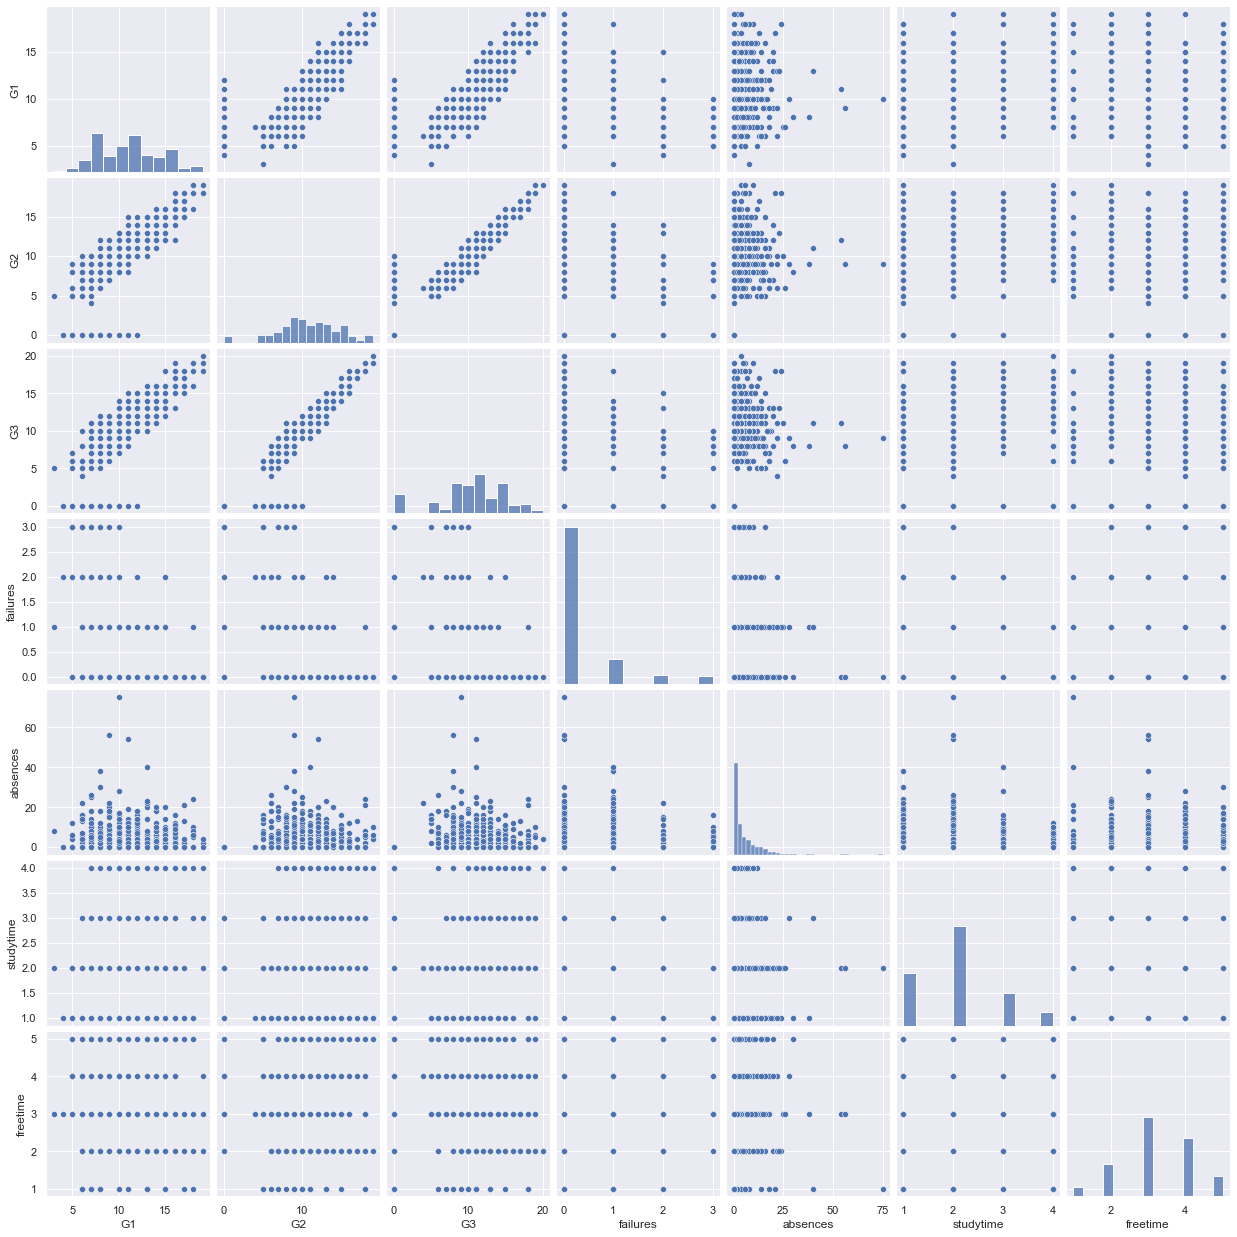

In [98]:
import seaborn as sns
sns.set()
sns.pairplot(data, height=2.5);

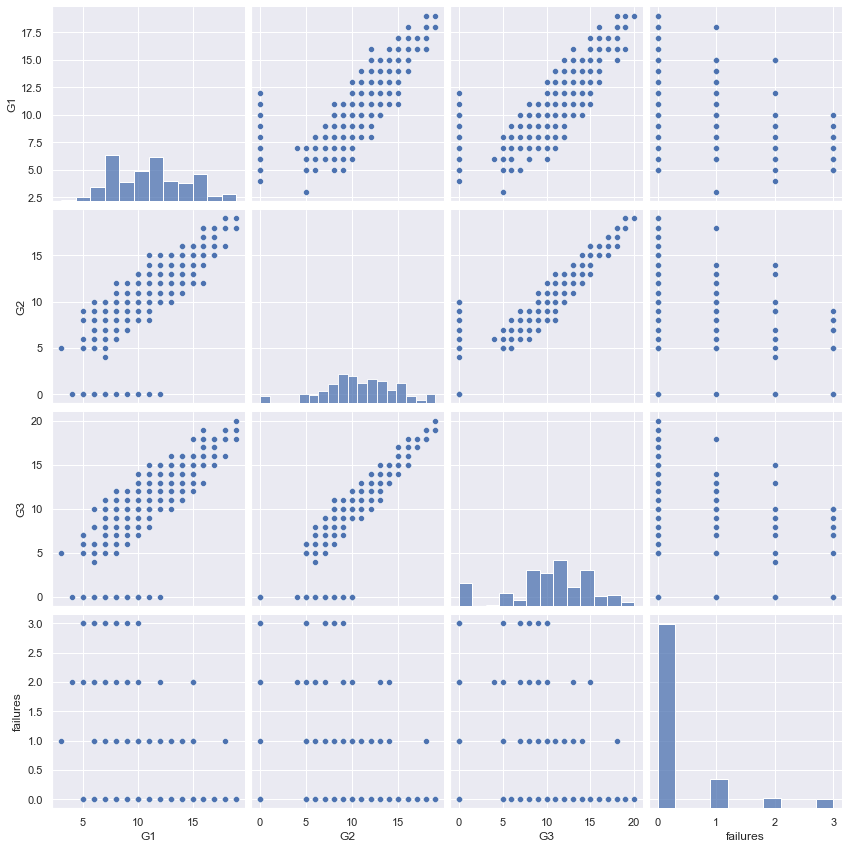

In [99]:
# By studying the results above, we can see there is a correlation between number G3 and failures and studytime
# and G3.
# There also appears to be a good linear relationship between G1 and G2, G2 and G3, but there is almost no 
# relationship between freetime and G3, or absences and G3 and studytime and G3.

# took the most releveant data, which are the features of this ML project
newdata = data[["G1", "G2", "G3", "failures"]]
sns.pairplot(newdata, height = 3)

[Text(0, 0, '3'),
 Text(1, 0, '4'),
 Text(2, 0, '5'),
 Text(3, 0, '6'),
 Text(4, 0, '7'),
 Text(5, 0, '8'),
 Text(6, 0, '9'),
 Text(7, 0, '10'),
 Text(8, 0, '11'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17'),
 Text(15, 0, '18'),
 Text(16, 0, '19')]

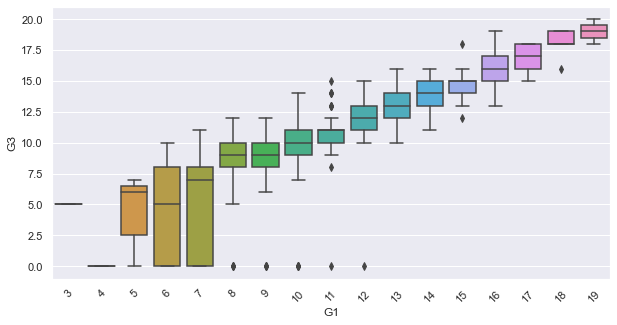

In [100]:
# used different different graphs to vilsualize the relationship between each feature and label. 
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.boxplot(x='G1', y='G3', data=newdata)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

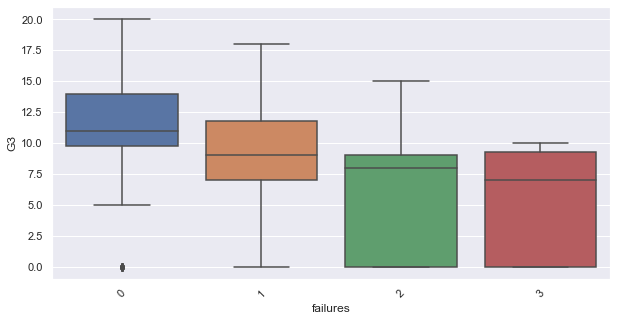

In [101]:
ax=sns.boxplot(x='failures', y='G3', data=newdata)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, '0'),
 Text(1, 0, '4'),
 Text(2, 0, '5'),
 Text(3, 0, '6'),
 Text(4, 0, '7'),
 Text(5, 0, '8'),
 Text(6, 0, '9'),
 Text(7, 0, '10'),
 Text(8, 0, '11'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17'),
 Text(15, 0, '18'),
 Text(16, 0, '19')]

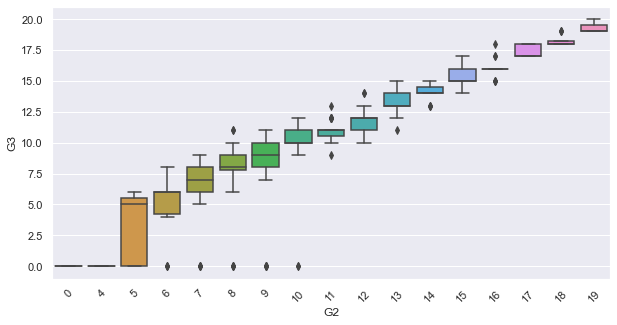

In [102]:

ax=sns.boxplot(x='G2', y='G3', data=newdata)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [103]:
label = "G3"
X = np.array(newdata.drop([label], 1))
y = np.array(newdata[label])


/var/folders/jl/qw20y6qn0csf3bkvb80cx8xr0000gn/T/ipykernel_28635/1034589127.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(newdata.drop([label], 1))


In [104]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.15)

In [112]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_train)
tr_error = mean_squared_error(y_pred, y_train)
labels = linear.predict(X_test).reshape(-1,1)
print(tr_error)

3.5658242743028197


In [113]:
Accuracy = linear.score(X_test, y_test)
intercept = linear.intercept_
Coefficient = linear.coef_

print(Accuracy) 
print(intercept)
print(Coefficient)


0.8102563199794561
-1.5075865222407376
[ 0.12099446  0.99446778 -0.2126981 ]


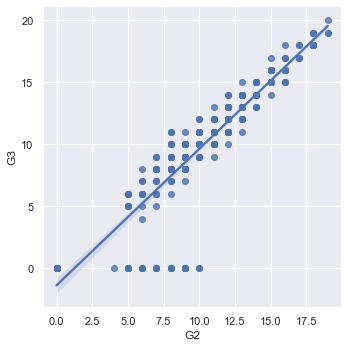

In [115]:
feature = "G2"
sns.lmplot(x = feature, y ='G3', data=newdata)